# **Information Retrieval in High Dimension Data**
## Assignment - 01
### Group - 4

Group Members: <br>
**Ankith Bheemanakone Venkatagiri :  03694766 <br>
Nikhitha Radhakrishna Naik : 03709543 <br>
Madwaraj Hatwar Kumbashi Raghavendra : 03697531<br>
Anirban Mishra : 03708979<br>
Tuhin Ghosh : 03708837**




## Curse of Dimensionality
### **Task 1**
Let $\mathbf{C}_d = \{\mathbf{x}\in \mathbb{R}^p\mid\|\mathbf{x}\|_\infty\leq\frac{d}{2}\}$ denote the $p$-dimensional hypercube of edge length $d$, centered at the origin.
#### **Part A**
Assume $\mathbf{X}$ to be uniformly distributed in $\mathbf{C}_1$. Determine $d$ in dependence of $p$ and $q\in[0, 1]$, such that
$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$
holds.

#### Solution : 
X is uniformly distributed in $\mathbf{C}_1$

$$Pr(\mathbf{X}\in\mathbf{C}_1)=1$$



$\int_{-1/2}^{1/2}$$\int_{-1/2}^{1/2}$....$\int_{-1/2}^{1/2}$$\int_{-1/2}^{1/2}\mathbf{z}\mathbf{dx}_1\mathbf{dx}_2......\mathbf{dx}_p$ = 1

Therefore, z = 1, and given that

$$Pr(\mathbf{X}\in\mathbf{C}_d)=q$$

$\int_{-d/2}^{d/2}$$\int_{-d/2}^{d/2}$....$\int_{-d/2}^{d/2}$$\int_{-d/2}^{d/2}\mathbf{z}\mathbf{dx}_1\mathbf{dx}_2......\mathbf{dx}_p$ = q

Thus, it can be shown that <br>
  $d^{p}={q}$


Hence,

${d}=\sqrt[p]{q}$





#### **Part  B**
Let the components of the $p$-dimensional random variable $\mathbf{X}^p$ be independent and have the standard normal distribution. It is known that $Pr(|\mathbf{X}^1|\leq2.576)=0.99$. For an arbitrary $p$, determine the probability $Pr(\|\mathbf{X}^p\|_\infty\gt2.576)$ for any of the components of $\mathbf{X}^p$ to lie outside of the interval $[-2.576, 2.576]$. Evaluate the value for $p = 2$, $p = 3$ and $p = 500$.

#### Solution :  

   \begin{equation}
    Given:  𝑃𝑟(|𝐗^1| ≤ 2.576) = 0.99 \\
    Then, 𝑃𝑟(‖𝐗^𝑝‖_∞ ≤ 2.576) = (0.99)^{p} \\
    Therefore,  𝑃𝑟(‖𝐗^𝑝‖_∞ > 2.576) = 1 - 𝑃𝑟(‖𝐗^𝑝‖_∞ ≤ 2.576)\ = 1 - (0.99)^{p} \\
    For p = 2,       𝑃𝑟(‖𝐗^2‖_∞ > 2.576) = 1 - (0.99)^{2} = 0.0199 \\
    For  p = 3,       𝑃𝑟(‖𝐗^3‖_∞ > 2.576) = 1 - (0.99)^{3} = 0.0297 \\
    For  p = 500,     𝑃𝑟(‖𝐗^{500}‖_∞ > 2.576) = 1 - (0.99)^{500} = 0.9934 \\
   \end{equation}

### **Task 2**
Provide the PYTHON code to the following tasks:
#### **Part A**
Sample $100$ uniformly distributed random vectors from the box $[-1, 1]^{d}$ for $d = 2$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

%matplotlib inline

Text(0.5, 1.0, 'Uniformly distributed vectors')

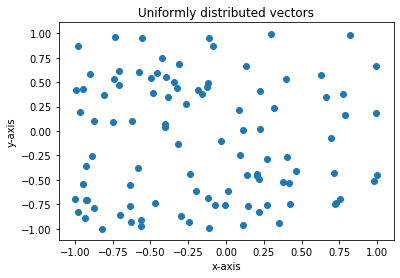

In [0]:
def sample_uniform_vectors(low, high, n, d):
    """
    Sample n uniformly distributed random vectors from the box [-1, 1]^d .
    
    """
    
    return np.random.uniform(low=low,high=high,size=(n,d))

x = sample_uniform_vectors(-1, 1, 100, 2) # 100 uniformly distributed random vector for d = 2
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Uniformly distributed vectors')

#### **Part B**
For each of the $100$ vectors determine the minimum angle to all other vectors. Then compute the average of these minimum angles. Note that for two vectors $\mathbf{x}$, $\mathbf{y}$ the cosine of the angle between the two vectors is defined as

$$\cos{((\mathbf{x}, \mathbf{y}))} = \frac{\langle \mathbf{x}, \mathbf{y} \rangle}{\|\mathbf{x}\|\|\mathbf{y}\|}.$$

In [0]:
def compute_angle(x, y):
    """
    Returns angle between vectors x and y in radians.
    
    """
    
    dot = np.dot(x, y)          # Inner product of x and y
    norm_x = LA.norm(x)         # Norm of vector x
    norm_y = LA.norm(y)         # Norm of vector y
    
    # prevent division by zero
    if norm_x == 0 or norm_y == 0:
        return 0
        
    # Calculate angle between x and y
    angle = np.arccos(dot/(norm_x*norm_y))
    
    return angle

In [0]:
def compute_avgang(x):
    """
    Return average angle between neighbouring vectors of data sample x.
    """
    
    # Calculate sample size and dimension
    n, d = x.shape
    min_angle = np.zeros(n)
    
    # Compute minimum angle for every vector a in the sample x
    for i, a in enumerate(x):
                 min_angle[i] = min([compute_angle(a, b) for j, b in enumerate(x) if j!=i])
    
    # Return average of minimum angles
    return np.average(min_angle)

# Compute average of minimum angles on data sample x
average_min_angle = compute_avgang(x)
average_min_angle

0.029186847732040853

#### **Part C**
Repeat the above for dimensions $d = 1, ..., 1000$ and use the results to plot the average minimum angle against the dimension.

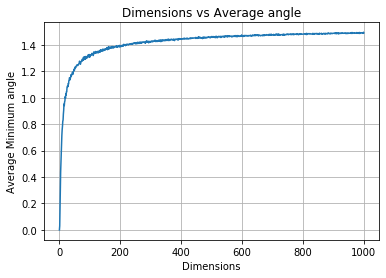

In [0]:
# Create a list to store the average minumum angles
avg_min_angle_list = []
# Loop through the dimensions 1 to 1000
for i in range(1,1001):
    # Sample 100 vectors with dimension i
    X_temp = sample_uniform_vectors(-1,1,100,i) 
    # Calculate average minimum angle
    avg_min_ang = compute_avgang(X_temp) 
    # Store the result in a list
    avg_min_angle_list.append(avg_min_ang) 

# plot average minimum angle against the dimensions
x_val = np.arange(1,1001)
plt.plot(x_val, avg_min_angle_list)
plt.xlabel('Dimensions')
plt.ylabel('Average Minimum angle')
plt.title('Dimensions vs Average angle')
plt.grid()

#### **Part D**
Give an interpretation of the result. What conclusion can you draw for $2$ randomly sampled vectors in a $d$-dimensional space?

#### Solution:

The above result can be interpreted as follows:

(1) As the dimension increases, the angle between two vectors sampled randomly tend to increase.

(2) The minimum angle can be seen converging to $\frac{\pi}{2}$ as the dimension increases. It means the two randomly sampled vectors are orthogonal to each other in $d$-dimensional space where d>>n.

(3) The sampled vectors become equidistant as the dimension increases and as the randomly sampled vector becomes equidistant, classifiers like k nearest neighbour cannot be used to classify them.

(4) Convergence to $\frac{\pi}{2}$ implies that most samples being concentrated in the 'corners' of the cube. This implies that most of the space is occupied by the corners.






#### **Part E**
Does the result change if the sample size increases?

0.006100256576177406

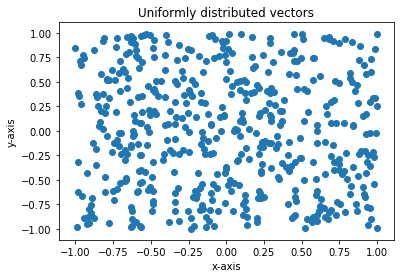

In [8]:
x2 = sample_uniform_vectors(-1, 1, 500, 2) # 500 uniformly distributed random vector for d = 2
plt.scatter(x2[:, 0], x2[:, 1])
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Uniformly distributed vectors')
# Compute the average minimum angle
average_min_angle_x2 = compute_avgang(x2)
average_min_angle_x2

We see that there is a decrease in the average minimum angle value with  increase in the sample size.
Now we plot the average minimum angle value against the dimensions.

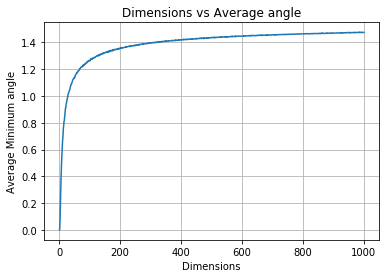

In [0]:
avg_min_angle_list_X2 = []
for i in range(1,1001):
    # Sample 500 vectors with dimension i
    X2_temp = sample_uniform_vectors(-1,1,500,i) 
    # Calculate average minimum angle
    avg_min_ang_X2 = compute_avgang(X2_temp) 
    # Store the result in a list
    avg_min_angle_list_X2.append(avg_min_ang_X2)

x_val = np.arange(1,1001)
plt.plot(x_val, avg_min_angle_list_X2)
plt.xlabel('Dimensions')
plt.ylabel('Average Minimum angle')
plt.title('Dimensions vs Average angle')
plt.grid()

When we change the sample size, the slope changes slightly but as the dimensions increases, it becomes more insignificant. We interprete the reason is that the sample becomes less relevant with the dimensionality increase and this relates to the curse of dimensionality, where the increase in dimensions dissipates the 'relationship' between the samples.

## Statistical Decision Making
### **Task 3**

#### **Part A**
The numbers in Figure 1 show the probability of the respective event to happen
(e.g. the probability for the event X = 1 and Y = 1 is 0:02). Is this table a
probability table? If so, why?

#### Solution:
Yes, the table is a probability table. It represents the joint probability between x and y summing up to 1 and all are individually more than 0 : $0.4+0.14+0.05+0.02+0.26+0.13=1$

#### **Part B**
Based on Figure 1 give the conditional expectation \begin{equation}E_{Y|X=2}[Y] \end{equation}and the probability
of the event X = 1 under the condition that Y = 3.

#### Solution:

$E_{Y|X=2}[Y] = \Sigma_{Y=1}^3 Y P(Y|X=2)$  
$E_{Y|X=2}[Y] = 1(P(Y=1|X=2)) + 2(P(Y=2|X=2))+3(P(Y=3|X=2))$

$E_{Y|X=2}[Y] = 1\frac{0.4}{0.4+0.14+0.05}+2\frac{0.14}{0.4+0.14+0.05}+3\frac{0.05}{0.4+0.14+0.05}$

$E_{Y|X=2}[Y] = \frac{83}{59}$ 

$E_{Y|X=2}[Y] =$ **1.40678**
                 
$P(X=1|Y=3) =  \frac {P(X=1\cap Y=3)} {P(Y=3)}  = \frac{0.13}{0.13+0.05}$ 
             = **0.722**


#### **Part C**
Is the function p(x, y) given by \begin{equation} p(x,y) = \begin{cases} 1 & 0 \leq x \leq 1, 0 \leq y \leq 0.5 \\ 0 & otherwise  \end{cases} \end{equation}<br> a joint density function for two random variables?

#### Solution:
Given that:

\begin{equation} p(x,y) = \begin{cases} 1 & 0 \leq x \leq 1, 0 \leq y \leq 0.5 \\ 0 & otherwise  \end{cases} \end{equation} <br>
   \begin{equation}
     \int \int p(x,y)dxdy = \int_{0}^{0.5} \int_{0}^{1} 1 dxdy \\
     \int \int p(x,y)dxdy = \int_{0}^{0.5} x|_{0}^{1} dy \\
     \int \int p(x,y)dxdy = \int_{0}^{0.5}1 dy = 0.5 \neq 1
   \end{equation}
This is not a joint probability distribution

#### **Part D**

For two random variables X and Y the joint density function is given by 
\begin{equation}
p(x,y) = 
          \begin{cases}
          2e^{-(x+y)} &  0 \leq x \leq y, 0 \leq y \\
           0 & otherwise.
          \end{cases}
\end{equation}
 What are the marginal density functions for X and Y respectively?


#### Solution:
Given that: <br>
\begin{equation}
p(x,y) = 
          \begin{cases}
          2e^{-(x+y)} &  0 \leq x \leq y, 0 \leq y \\
           0 & otherwise.
          \end{cases}
\end{equation}

First we calculate the marginal density function for $\mathbf{Y}$.
   \begin{equation}
     p(y) = \int_{0}^{y} p(x,y)dx  \\
     p(y) = \int_{0}^{y} 2e^{-(x+y)} dx \\
     p(y) = 2e^{-y} \int_{0}^{y} e^{-x} dx \\
     p(y) = 2e^{-y} [-e^{-x}]_{0}^{y}\\
     p(y) = 2e^{-y} (-e^{-y} + 1) = 2e^{-y} (1 - e^{-y})\\
   \end{equation}
Similarly for $\mathbf{X}$.
   \begin{equation}
     p(x) = \int_{x}^{\infty} p(x,y)dy  \\
     p(x) = \int_{x}^{\infty} 2e^{-(x+y)} dy \\
     p(x) = 2e^{-x} \int_{x}^{\infty} e^{-y} dy \\
     p(x) = 2e^{-x} [-e^{-y}]_{x}^{\infty}\\
     p(x) = 2e^{-x} [0 + e^{-x}] \\
     p(x) = 2e^{-2x}
   \end{equation}

#### **Part E**

Let the joint density function of two random variables X and Y be given by \begin{equation}
p(x,y) = \begin{cases}
          \frac{2x+4y}{15} & 0 < x <3, 0 < y < 1 \\
          0 &otherwise
          \end{cases}
\end{equation} 
<br> Determine the probability for X $\leq 2$ under the condition that Y = $\frac{1}{2}$?

#### Solution:
Given that: 
\begin{equation}
p(x,y) = \begin{cases}
          \frac{2x+4y}{15} & 0 < x <3, 0 < y < 1 \\
          0 &otherwise
          \end{cases}
\end{equation} 
Now,
   \begin{equation}
    p \left(X \leq 2|Y = \frac{1}{2}\right) = \int_{0}^{2} \left[\frac{p(x,y)}{p(y)}\right]_{y=\frac{1}{2}} dx \\
    \end{equation}
    Calculate p(y)
    \begin{equation}
    p(y) = \int_{0}^{3} p(x,y)dx \\
    p(y) = \int_{0}^{3} \frac{2x+4y}{15}dx \\
    p(y) = \left[\frac{x^2 + 4xy}{15}\right]_{x=0}^{3} \\
    p(y) = \frac{9+12y}{15} \\
\end{equation}
    Now,
    \begin{equation}
    p \left(X \leq 2|Y = \frac{1}{2}\right) = \int_{0}^{2} \left[\frac{\frac{2x+4y}{15}}{\frac{9+12y}{15}}\right]_{y=\frac{1}{2}} dx \\
    p \left(X \leq 2|Y = \frac{1}{2}\right) = \int_{0}^{2} \frac{2x+2}{9+6} dx \\
    p \left(X \leq 2|Y = \frac{1}{2}\right) = \frac{[x^2 + 2x]_{x=0}^{2}}{15} = \frac{8}{15}
   \end{equation}

### **Task 4**

Show that the covariance matrix C of any random variable $X \in R^p$ is
symmetric positive semidefinite, i.e. $C = C^T$ and $x^TCx \geq 0$ for any covariance
matrix $C \in R^{pxp}$ and any $x \in R^p$.

#### Solution:

$C$ is the Covariance matrix of random variable $X \in R^p$.

To prove: $C$ is symmetric i.e. $C = C^T$ and $x^TCx \geq 0$ i.e. positive semi definite. 

$C = E[(X - \mu)(X - \mu)^T$]

$C = E[(X - \mu)(X^T - \mu^T)$]

$C = E[XX^T - X\mu^T - \mu X^T + \mu\mu^T$]

$C = E[XX^T] - E[X]\mu^T - \mu E[X^T] + \mu\mu^T$

$C = E[XX^T] - \mu\mu^T$ -> equation 1

Now, calculate $C^T$ :

$C^T = E[(X - \mu)^T(X - \mu)$]

$C^T = E[(X^T - \mu^T)(X - \mu)$]

$C^T = E[XX^T - \mu X^T - X\mu^T  + \mu\mu^T$]

$C^T = E[XX^T] - \mu E[X^T] - E[X]\mu^T  + \mu\mu^T$

$C^T = E[XX^T] - \mu\mu^T$ -> equation 2

From equations 1 and 2, $C = C^T$ i.e $C$ is symmetric. <br>
Next, we prove that $x^TCx \geq 0$:

$x^TCx = x^TE[(X - \mu)(X - \mu)^T]x$

$x^TCx = E[x^T(X - \mu)(x^T(X - \mu))^T]$

Let $z = x^T(X - \mu)$

$x^TCx = E[zz^T] \geq 0$

Therefore, $x^TCx$ is positive semi definite.
